In [25]:
from ImageAnalysis import cellImageAnalysis as ca    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import importlib

In [5]:
from cellpose import models

In [12]:
importlib.reload(ca)

<module 'ImageAnalysis.cellImageAnalysis' from '/home/gabor/Documents/projects/cellImageAnalysis/ImageAnalysis/cellImageAnalysis.py'>

In [13]:
a=ca.Image("data/20230330/JNK1B1_barr2_1.tif")

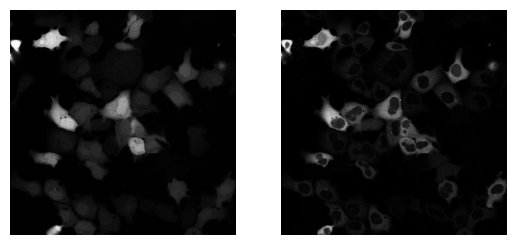

In [14]:
a.load_image()

a.display_image()

In [15]:
detector = ca.CellposeDetector(0, 1)

In [16]:
masks = detector.detect_cells(a.image[:750,:750,:])

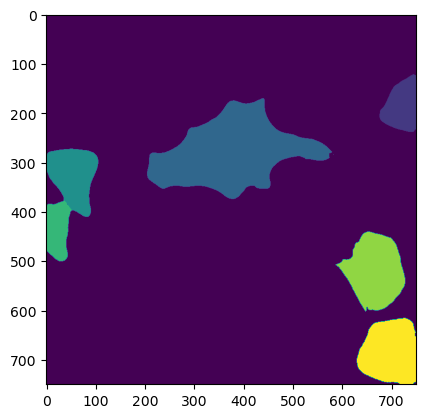

In [45]:
plt.imshow(masks)

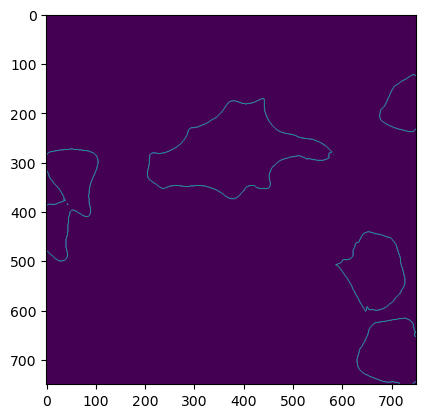

In [18]:
plt.imshow(detector.detect_cell_borders(masks))

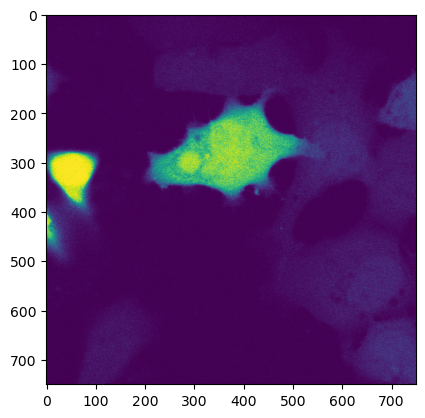

In [34]:
plt.imshow(a.image[:750,:750,0])

In [47]:
class Analyzer:
    
    def __init__(self):
        pass
    
    def get_cell_fluorescence(self, img, masks):
        img = img.reshape(-1,1)
        masks = masks.reshape(-1,1)
        
        joint = np.concatenate((img, masks), axis=1)
        
        result = pd.DataFrame(joint)
        
        result.columns = ["intensity", "mask"]
        
        return result.groupby("mask").mean()

In [48]:
analyzer = Analyzer()

In [49]:
result = analyzer.get_cell_fluorescence(a.image[:750,:750,0], masks)

In [50]:
result

,intensity
mask,
0,102.093950
1,593.305371
2,2463.820930
3,2810.582001
4,989.215682
5,339.785685
6,444.096377
